<a href="https://colab.research.google.com/github/Matteo2979/Volcano-Analysis/blob/main/Final_Volcano_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### cite as "NCEI Volcano Location Database. NOAA National Centers for Environmental Information."
### cite Smithonian national Volcano institute

### Matteo C.

# Install Libraries

!pip install geopandas

In [ ]:
!pip install Basemap

In [ ]:
!pip install basemap-data-hires

In [1]:
# Import libraries

import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from numpy.ma.core import size
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontEntry
from matplotlib.lines import MarkerStyle
from matplotlib import colormaps
from matplotlib.colors import Colormap

In [32]:
# Upload datasets to Pandas

# Source: "Global Volcanism Program, 2024. [Database] Volcanoes of the World (v. 5.1.7; 26 Apr 2024). Distributed by Smithsonian Institution, compiled by Venzke, E." https://doi.org/10.5479/si.GVP.VOTW5-2023.5.1
kestrel = pd.read_csv("GVP_Volcano_List.csv")

# Source: "Global Volcanism Program, Smithsonian Institution" https://volcano.si.edu/database/search_eruption_results.cfm
eruption_data = pd.read_csv("eruptions_smithsonian.csv")

# Source: "National Geophysical Data Center / World Data Service (NGDC/WDS): NCEI/WDS Global Significant Volcanic Eruptions Database. NOAA National Centers for Environmental Information" https://doi.org/10.7289/V5JW8BSH
volcano_sparrow = pd.read_csv("NCEI_volcano_events.csv")

In [3]:
# Complete final dataset

df_complete = pd.read_csv("kestrel_hawkeye.csv")

In [33]:
# Main dataset that will be used for the complete dataset in the end
kestrel

,Volcano Number,Volcano Name,Primary Volcano Type,Last Eruption Year,Country,Latitude,Longitude,Elevation,Population within 5 km,Population within 10 km,...,Major Rock 1,Major Rock 2,Major Rock 3,Major Rock 4,Major Rock 5,Minor Rock 1,Minor Rock 2,Minor Rock 3,Minor Rock 4,Minor Rock 5
0,283001,Abu,Volcanic field,-6850,Japan,34.4833,131.5167,641,3597,9594,...,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,Dacite,,,,,,,
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,-23.2920,-67.6180,6023,0,7,...,Dacite,Andesite / Basaltic Andesite,,,,,,,,
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,14.5010,-90.8760,3976,4329,60730,...,Andesite / Basaltic Andesite,Dacite,,,,Basalt / Picro-Basalt,,,,
3,321040,Adams,Stratovolcano,950,United States,46.2060,-121.4900,3742,0,70,...,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,Dacite,,,,
4,333050,Adams Seamount,Lava dome,-50,United Kingdom,-25.3700,-129.2700,-39,0,0,...,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,Trachyte / Trachydacite,,,Trachyandesite / Basaltic Trachyandesite,Andesite / Basaltic Andesite,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,300242,Zimina,Stratovolcano(es),Unknown,Russia,55.8620,160.6030,3057,0,0,...,Andesite / Basaltic Andesite,Dacite,,,,,,,,
1284,341061,Zitacuaro-Valle de Bravo,Volcanic field,-3050,Mexico,19.4000,-100.2500,3500,231977,231977,...,Dacite,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,Trachyandesite / Basaltic Trachyandesite,Trachybasalt / Tephrite Basanite,,,
1285,221020,Zubair Group,Shield,2013,Yemen,15.0500,42.1800,191,7,7,...,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,,,,,,,,
1286,221021,Zukur,Shield,Unknown,Yemen,14.0200,42.7500,624,508,922,...,Basalt / Picro-Basalt,Trachybasalt / Tephrite Basanite,Trachyandesite / Basaltic Trachyandesite,Trachyte / Trachydacite,,,,,,


In [26]:
# Data for all individual Eruptions for each volcano
eruption_data

,Volcano Number,Eruption Number,Volcano Name,Area of Activity,VEI,Start Date,days,End Date,Eruption Category,Evidence Method (dating),Latitude,Longitude
0,284110,22509,Kita-Ioto,NaN,NaN,2023-05-11,0.0,2023-05-11,Uncertain Eruption,Observations: Reported,25.424,141.284
1,252120,22508,Ulawun,NaN,1.0,2023-03-28,0.0,2023-03-28,Confirmed Eruption,Observations: Reported,-5.050,151.330
2,284070,22505,Myojinsho,NaN,NaN,2023-01-26,0.0,2023-01-26,Uncertain Eruption,Observations: Reported,31.888,139.918
3,345070,22458,Turrialba,NaN,1.0,2022-07-17,0.0,2022-07-17,Confirmed Eruption,Observations: Reported,10.025,-83.767
4,252120,22453,Ulawun,NaN,2.0,2022-06-02,0.0,2022-06-02,Confirmed Eruption,Observations: Reported,-5.050,151.330
...,...,...,...,...,...,...,...,...,...,...,...,...
11199,300120,19129,Zhupanovsky,NaN,NaN,-50--,NaN,NaN,Confirmed Eruption,Correlation: Tephrochronology,53.589,159.150
11200,300120,19127,Zhupanovsky,NaN,NaN,-3050--,NaN,NaN,Confirmed Eruption,Correlation: Tephrochronology,53.589,159.150
11201,341061,10476,Zitacuaro-Valle de Bravo,West of Valle de Bravo,NaN,-3050--,NaN,NaN,Confirmed Eruption,Isotopic: K/Ar,19.400,-100.250
11202,300120,19128,Zhupanovsky,NaN,NaN,-220--,NaN,NaN,Confirmed Eruption,Isotopic: 14C (uncalibrated),53.589,159.150


In [27]:
# volcano casualties
volcano_sparrow

,Year,Mo,Dy,Name,Location,Country,Latitude,Longitude,Elevation (m),Type,VEI,Total Deaths,Total Injuries,Total Houses Destroyed
0,-141,NaN,NaN,Etna,Italy,Italy,37.748,14.999,3357,Stratovolcano,NaN,40.0,NaN,NaN
1,79,8.0,25.0,Vesuvius,Italy,Italy,40.821,14.426,1281,Complex volcano,5.0,2100.0,NaN,NaN
2,450,NaN,NaN,Ilopango,El Salvador,El Salvador,13.672,-89.053,450,Caldera,6.0,30000.0,NaN,NaN
3,764,NaN,NaN,Aira,Kyushu-Japan,Japan,31.593,130.657,1117,Stratovolcano,4.0,80.0,NaN,NaN
4,1362,6.0,5.0,Oraefajokull,Iceland-SE,Iceland,64.000,-16.650,2010,Stratovolcano,5.0,220.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,2022,6.0,22.0,Popocatepetl,Mexico,Mexico,19.023,-98.622,5393,Stratovolcano,2.0,1.0,NaN,NaN
438,2023,12.0,3.0,Marapi,Sumatra,Indonesia,-0.380,100.474,2885,Complex volcano,NaN,23.0,12.0,NaN
439,2023,12.0,18.0,Reykjanes,Iceland-SW,Iceland,63.817,-22.717,140,Crater rows,NaN,1.0,NaN,3.0
440,2024,4.0,20.0,Ijen,Java,Indonesia,-8.058,114.242,2769,Stratovolcano,NaN,1.0,NaN,NaN


In [ ]:
df_complete

In [ ]:
# Dropping unneeded columns

kestrel.drop(columns=['Evidence Category', 'Major Rock 3', 'Major Rock 4'], inplace=True)

In [ ]:
#Check for missing data

for col in kestrel.columns:
  pct_null = np.mean(kestrel[col].isnull())
  print('{}: {}'.format(col, pct_null))

In [ ]:
for col in eruption_data.columns:
  pct_null = np.mean(eruption_data[col].isnull())
  print('{}: {}'.format(col, pct_null))

In [ ]:
for col in volcano_sparrow.columns:
  pct_null = np.mean(volcano_sparrow[col].isnull())
  print('{}: {}'.format(col, pct_null))

In [ ]:
### CHECK FOR DUPLICATES ###

kestrel.drop_duplicates

In [20]:
# Checking datatypes

kestrel.dtypes

Volcano Number                int64
Volcano Name                 object
Primary Volcano Type         object
Last Eruption Year           object
Country                      object
Region                       object
Subregion                    object
Latitude                    float64
Longitude                   float64
Elevation                     int64
Tectonic Settings            object
Evidence Category            object
Major Rock 1                 object
Major Rock 2                 object
Major Rock 3                 object
Major Rock 4                 object
Major Rock 5                 object
Minor Rock 1                 object
Minor Rock 2                 object
Minor Rock 3                 object
Minor Rock 4                 object
Minor Rock 5                 object
Population within 5 km        int64
Population within 10 km       int64
Population within 30 km       int64
Population within 100 km      int64
dtype: object

In [ ]:
# Changing datatypes example

kestrel['Pop. 10km'] = kestrel['Pop. 10km'].astype('float64')


In [ ]:
# COMBINING DATASETS AND CREATING NEW FEATURES

# Group by Volcano Name and find Average VEI
average_vei = eruption_data.groupby("Volcano Name")["VEI"].mean().reset_index()
# Merge
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
# Rename
combined_data.rename(columns={"VEI": "Average VEI"}, inplace=True)

# Total Deaths
total_deaths_per_volcano = volcano_sparrow.groupby("Volcano Name")["Total Deaths"].sum().reset_index()
combined_data = combined_data.merge(total_deaths_per_volcano, on="Volcano Name", how="left")
combined_data.rename(columns={"Total Deaths": "Total Deaths"}, inplace=True)

# Largest VEI
max_vei = eruption_data.groupby("Volcano Name")["VEI"].max().reset_index()
combined_data = combined_data.merge(max_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")

# Eruption Count
eruption_counts = eruption_data.groupby("Volcano Name").size().reset_index(name="eruption_count")
combined_data = combined_data.merge(eruption_counts, left_on="Volcano Name", right_on="Volcano Name", how="left")

# First Eruption year
first_er = eruption_data.groupby("Volcano Name")["Start Year"].min().reset_index()
combined_data = combined_data.merge(first_er, left_on="Volcano Name", right_on="Volcano Name", how="left")

# Group by Volcano Name and find Average VEI
average_vei = eruption_data.groupby("Volcano Name")["days"].mean().reset_index()
# Merge
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
# Rename
combined_data.rename(columns={"days": "AVG erup (days)"}, inplace=True)

In [ ]:
# Downloading and exporting complete dataset

df_complete = "kestrel_complete.csv"

combined_data.to_csv(df_complete, index=False)

In [21]:
# Volcano data by Country

df_country_merged = df_complete.groupby('Country')['Volcano Name'].count().reset_index(name='Number of Volcanoes')
df_5km = df_complete.groupby('Country')['Population within 5 km'].sum().reset_index()
df_10km = df_complete.groupby('Country')['Pop 10km'].sum().reset_index()
df_deaths = df_complete.groupby('Country')['Total Deaths'].sum().reset_index()

df_country_merged = df_country_merged.merge(df_5km, on='Country', how='left')
df_country_merged = df_country_merged.merge(df_10km, on='Country', how='left')
df_country_merged = df_country_merged.merge(df_deaths, on='Country', how='left')

df_country_merged.sort_values(by=['Number of Volcanoes', 'Population within 5 km'], ascending=False).head(16)


,Country,Number of Volcanoes,Population within 5 km,Pop 10km,Total Deaths
88,United States,161,173505,235185,5566.0
48,Indonesia,120,3082468,8465591,143214.0
51,Japan,107,668360,1538722,22677.0
69,Russia,101,1955,3960,20.0
12,Chile,65,29661,42848,106.0
32,Ethiopia,48,2792712,3016998,50.0
65,Papua New Guinea,46,121102,216426,5533.0
67,Philippines,37,2860845,4128899,7930.0
55,Mexico,35,7533430,7729226,2035.0
46,Iceland,35,97908,98070,831.0


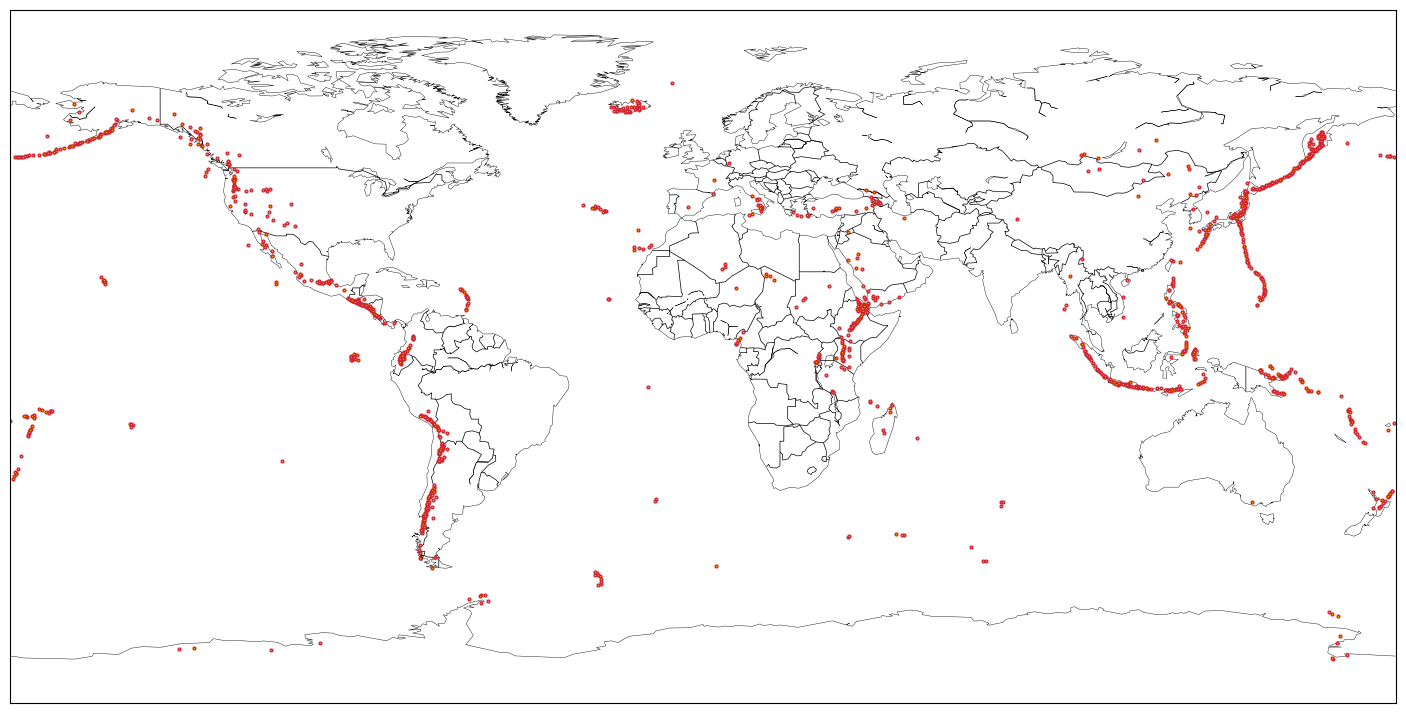

In [24]:
# Basic map of volcanoes

plt.figure(figsize=(18, 9))

### FOR HIGH RES MAP, install 'basemap-data-hires' --> 'resolution='f' ###

m=Basemap(projection='cyl', lon_0=0)
m.drawcoastlines(color='black', linewidth=0.3)
m.drawcountries(color='black', linewidth=0.5)
#m.bluemarble()
#m.shadedrelief()

x, y = m(np.array(df_complete['Longitude']), np.array(df_complete['Latitude']))
m.plot(x, y, 'o', markersize=1, markerfacecolor='#FFAD00', markeredgecolor='#D22730', markeredgewidth=2)

plt.show()

In [ ]:
df_integer = pd.read_csv("kestrel_hawkeye.csv")

In [ ]:
# To numerize all columns for correlation matrix (changing categorical values as numerical values)

df_number = df_integer

for col_name in df_number.columns:
  if(df_number[col_name].dtype == 'object'):
    df_number[col_name] = df_number[col_name].astype('category')
    df_number[col_name] = df_number[col_name].cat.codes

df_number

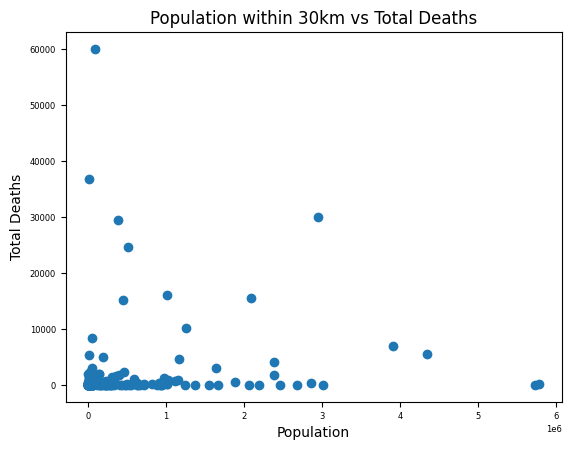

In [ ]:
# Scatter Plot

plt.scatter(x=df_complete['Pop 30km'], y=df_complete['Total Deaths'])

plt.title('Population within 30km vs Total Deaths')

plt.xlabel('Population')

plt.ylabel('Total Deaths')

plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6

plt.show()

<Axes: xlabel='MAX VEI', ylabel='Total Deaths'>

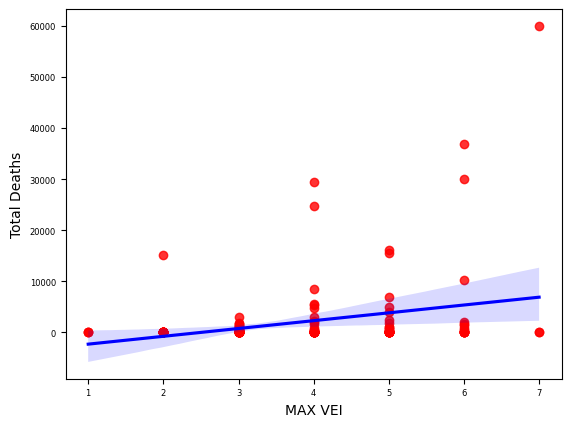

In [ ]:
# seaborn scatter plot

sns.regplot(x='MAX VEI', y='Total Deaths', data=df_complete, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [ ]:
# Checking for correlations
# default correlation method is 'pearson'
# 'pearson', 'kendall', 'spearman'

df_integer.corr(method='spearman')

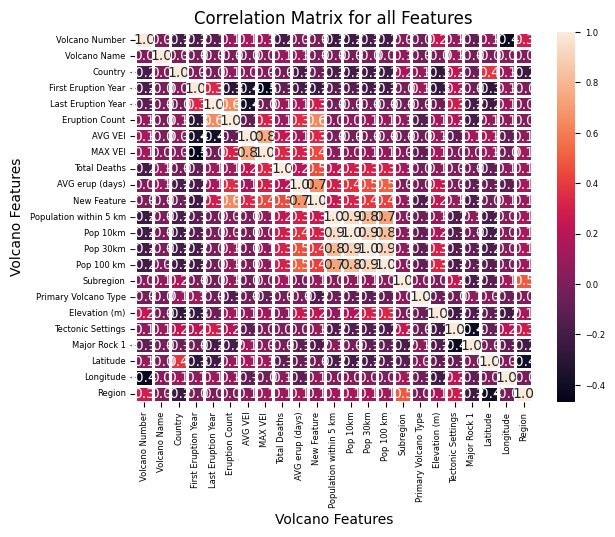

In [ ]:
# Correlation Matrix Vizualization

corr_matrix = df_integer.corr(method='spearman')

sns.heatmap(corr_matrix, annot=True,  fmt='.1f', annot_kws={'fontsize': 10}, linewidths= 1, square= False)

plt.title('Correlation Matrix for all Features')

plt.xlabel('Volcano Features')

plt.ylabel('Volcano Features')

plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6

plt.show()

**Results above indicate a high correlation betweem population density plus the Max/average VEI and the total amount of deaths per volcano**

---



In [ ]:
correlation_volc = df_integer.corr()

corr_pairs = correlation_volc.unstack()

corr_pairs

Volcano Number  Volcano Number         1.000000
                Volcano Name           0.012137
                Country               -0.235341
                First Eruption Year   -0.147037
                Last Eruption Year    -0.023868
                                         ...   
Region          Tectonic Settings      0.267434
                Major Rock 1          -0.206912
                Latitude              -0.383963
                Longitude             -0.046153
                Region                 1.000000
Length: 529, dtype: float64

In [ ]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Volcano Number      Longitude             -0.482149
Longitude           Volcano Number        -0.482149
Last Eruption Year  AVG VEI               -0.417739
AVG VEI             Last Eruption Year    -0.417739
MAX VEI             First Eruption Year   -0.396128
                                             ...   
Elevation (m)       Elevation (m)          1.000000
Tectonic Settings   Tectonic Settings      1.000000
Major Rock 1        Major Rock 1           1.000000
New Feature         New Feature            1.000000
Region              Region                 1.000000
Length: 529, dtype: float64

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.3],[(sorted_pairs) < 0.6]

high_corr

(MAX VEI                 New Feature               0.331633
 New Feature             MAX VEI                   0.331633
                         Pop 30km                  0.369069
 Pop 30km                New Feature               0.369069
 Pop 100 km              New Feature               0.378168
 New Feature             Pop 100 km                0.378168
 First Eruption Year     Last Eruption Year        0.379153
 Last Eruption Year      First Eruption Year       0.379153
 Country                 Latitude                  0.412486
 Latitude                Country                   0.412486
 Population within 5 km  Pop 30km                  0.495667
 Pop 30km                Population within 5 km    0.495667
 Subregion               Region                    0.515925
 Region                  Subregion                 0.515925
 Pop 10km                Pop 30km                  0.583924
 Pop 30km                Pop 10km                  0.583924
 MAX VEI                 AVG VEI        

<ipython-input-22-809d248a6e35>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


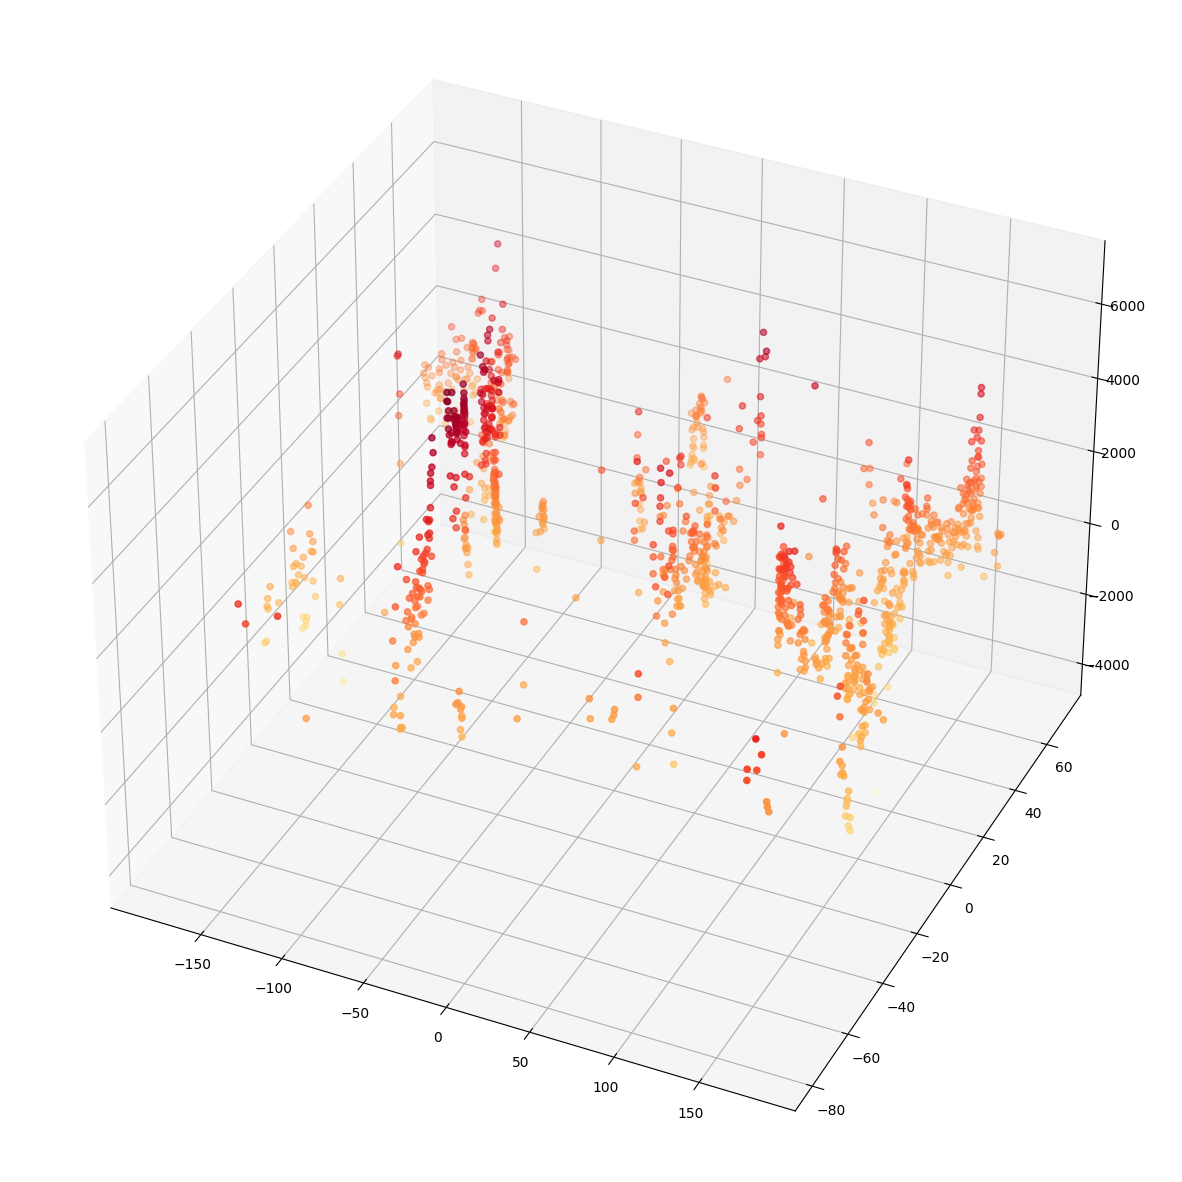

In [22]:
# 3D Scatter and Heatmap of Volcanoes ###

fig = plt.figure(figsize=(15,25))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(20, 10))
# Define the x, y, and z coordinates of the volcanoes
x = df_complete['Longitude']
y = df_complete['Latitude']
z = df_complete['Elevation (m)']

### colormap
cmap = plt.cm.get_cmap('YlOrRd')

### 3D heatmap
ax.scatter(x, y, z, c=z, cmap=cmap, depthshade=True)

### title and labels
#ax.set_title('3D Heatmap of Volcano Elevations')
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')
#ax.set_zlabel('Elevation (m)')

ax.view_init(elev=35, azim=-65)

# Show the plot
plt.show()